In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# load the data 
df = pd.read_csv('StudentsPerformance_Large.csv')
df

,StudentID,Name,Math score,Science score,English score,History score,Computer score
0,1,Gloria Ruiz,74,84,82,64,53
1,2,Elizabeth Richardson,49,65,56,88,68
2,3,Dr. Gabriel Perry,76,64,91,40,100
3,4,Jillian Thompson,82,94,72,45,63
4,5,James Rogers,94,60,64,83,93
...,...,...,...,...,...,...,...
845,846,Edward Hodge,66,84,84,49,82
846,847,Jessica Evans,78,92,46,91,53
847,848,Mary Bell,90,63,99,40,42
848,849,Kimberly Snyder,89,80,49,84,65


## Checking Missing values or Duplicate

In [4]:
print(df.isna().sum())
print(df.dtypes)

StudentID         0
Name              0
Math score        0
Science score     0
English score     0
History score     0
Computer score    0
dtype: int64
StudentID          int64
Name              object
Math score         int64
Science score      int64
English score      int64
History score      int64
Computer score     int64
dtype: object


In [5]:
df.duplicated().sum()

0

In [6]:
len(df)

850

## Rename columns for clarity

In [7]:
df.columns= [col.strip().lower().replace(' ','_') for col in df.columns]

In [8]:
df

,studentid,name,math_score,science_score,english_score,history_score,computer_score
0,1,Gloria Ruiz,74,84,82,64,53
1,2,Elizabeth Richardson,49,65,56,88,68
2,3,Dr. Gabriel Perry,76,64,91,40,100
3,4,Jillian Thompson,82,94,72,45,63
4,5,James Rogers,94,60,64,83,93
...,...,...,...,...,...,...,...
845,846,Edward Hodge,66,84,84,49,82
846,847,Jessica Evans,78,92,46,91,53
847,848,Mary Bell,90,63,99,40,42
848,849,Kimberly Snyder,89,80,49,84,65


## Calculating Total Marks and Average 

In [9]:
Subject_cols = ['math_score', 'science_score', 'english_score', 'history_score', 'computer_score']
df['total_score'] = df[Subject_cols].sum(axis=1)
df['average_score'] = df[Subject_cols].mean(axis=1)


In [10]:
df

,studentid,name,math_score,science_score,english_score,history_score,computer_score,total_score,average_score
0,1,Gloria Ruiz,74,84,82,64,53,357,71.4
1,2,Elizabeth Richardson,49,65,56,88,68,326,65.2
2,3,Dr. Gabriel Perry,76,64,91,40,100,371,74.2
3,4,Jillian Thompson,82,94,72,45,63,356,71.2
4,5,James Rogers,94,60,64,83,93,394,78.8
...,...,...,...,...,...,...,...,...,...
845,846,Edward Hodge,66,84,84,49,82,365,73.0
846,847,Jessica Evans,78,92,46,91,53,360,72.0
847,848,Mary Bell,90,63,99,40,42,334,66.8
848,849,Kimberly Snyder,89,80,49,84,65,367,73.4


## Handling Outliers of Each Subject


<Axes: xlabel='math_score'>

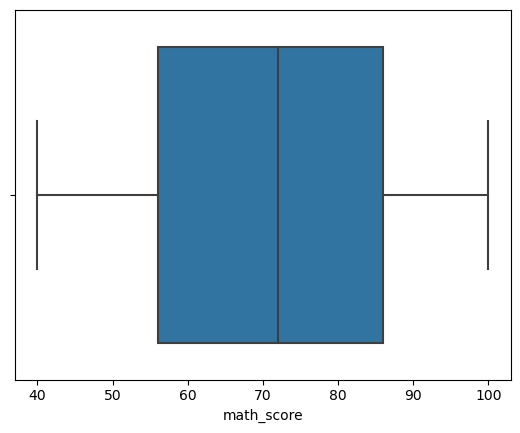

In [11]:
# Check for outliers
sns.boxplot(data=df, x='math_score', orient='h')

<Axes: xlabel='science_score'>

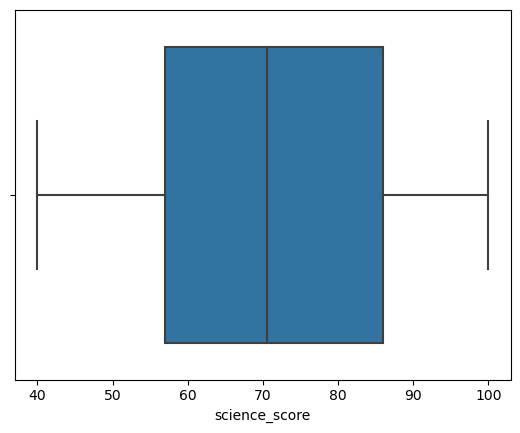

In [12]:
sns.boxplot(data=df, x='science_score', orient='h')

<Axes: xlabel='english_score'>

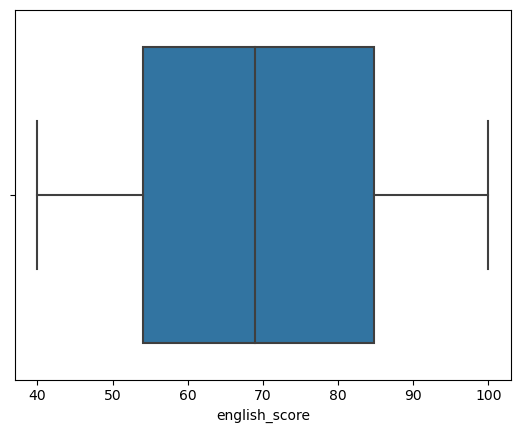

In [13]:
sns.boxplot(data=df, x='english_score', orient='h')

<Axes: xlabel='history_score'>

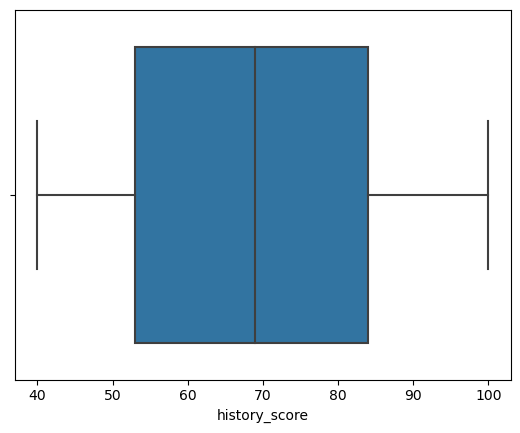

In [14]:
sns.boxplot(data=df, x='history_score', orient='h')

<Axes: xlabel='computer_score'>

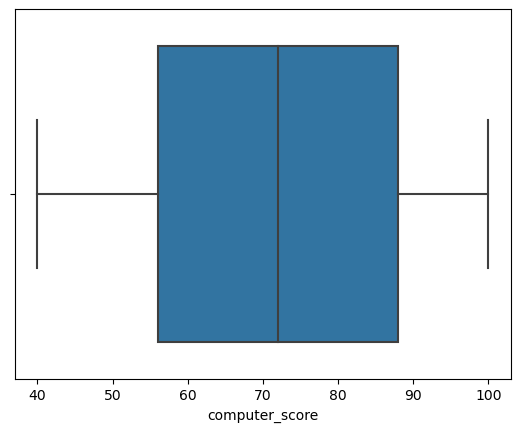

In [15]:
sns.boxplot(data=df, x='computer_score', orient='h')

## So we clearly see that there is no outlier present in each subject.

## Grading Function

In [16]:
def grade(avg):
    if avg>=90:
        return 'A+'
    elif avg>=80:
        return 'A'
    elif avg>=70:
        return 'B+'
    elif avg>=60:
        return 'B'
    elif avg>=50:
        return 'C+'
    elif avg>=40:
        return 'C'
    else:
        return 'F'
    
df['Grade'] = df['average_score'].apply(grade)
    
        

In [17]:
df

,studentid,name,math_score,science_score,english_score,history_score,computer_score,total_score,average_score,Grade
0,1,Gloria Ruiz,74,84,82,64,53,357,71.4,B+
1,2,Elizabeth Richardson,49,65,56,88,68,326,65.2,B
2,3,Dr. Gabriel Perry,76,64,91,40,100,371,74.2,B+
3,4,Jillian Thompson,82,94,72,45,63,356,71.2,B+
4,5,James Rogers,94,60,64,83,93,394,78.8,B+
...,...,...,...,...,...,...,...,...,...,...
845,846,Edward Hodge,66,84,84,49,82,365,73.0,B+
846,847,Jessica Evans,78,92,46,91,53,360,72.0,B+
847,848,Mary Bell,90,63,99,40,42,334,66.8,B
848,849,Kimberly Snyder,89,80,49,84,65,367,73.4,B+


## Top Performers

In [18]:
top_5 = df.sort_values(by='total_score', ascending=False).head(5)
print(top_5[['name', 'total_score', 'average_score', 'Grade']])


                 name  total_score  average_score Grade
467      Angela Jones          469           93.8    A+
636     John Mann PhD          450           90.0    A+
469  Robert Patterson          449           89.8     A
797     Bryan Russell          444           88.8     A
659   Matthew Garrett          443           88.6     A


## Visualization 


### Bar Plot: Subject-wise average 

In [27]:
# Only selecting subject columns temporarily for averaging
subject_avg = df[['math_score', 'science_score', 'english_score', 'history_score', 'computer_score']].mean()

print(subject_avg)


math_score        70.840000
science_score     70.661176
english_score     69.122353
history_score     69.080000
computer_score    71.597647
dtype: float64


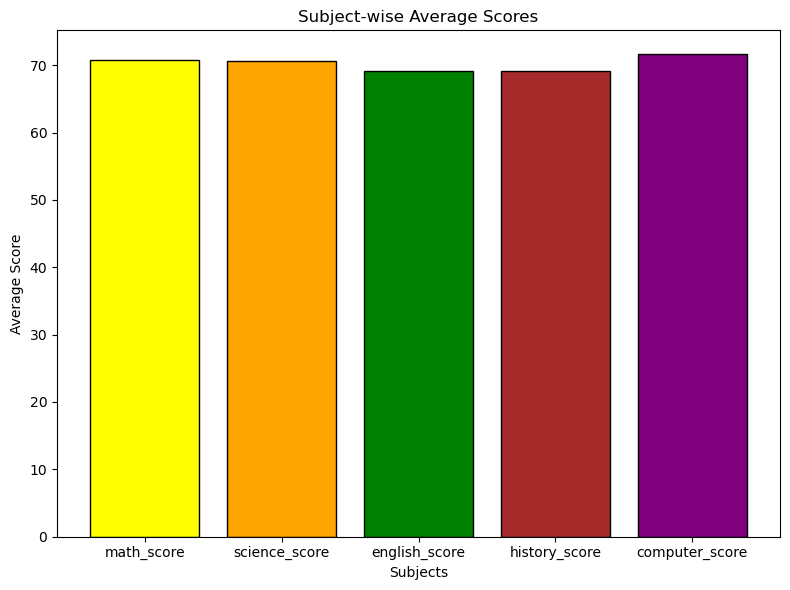

In [41]:
# Assuming subject_avg is a pandas Series
plt.figure(figsize=(8, 6))
plt.bar(subject_avg.index, subject_avg.values, color=['yellow','orange','green','brown', 'purple'], edgecolor='black')
plt.title("Subject-wise Average Scores")
plt.xlabel("Subjects")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()


### Pie Chart: Grade distribution 

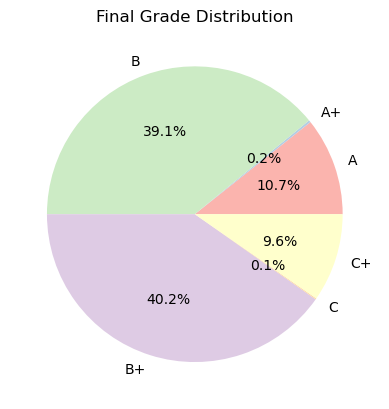

In [37]:
# b. Pie chart: Grade Distribution
grade_dist.plot.pie(autopct='%1.1f%%', colors=plt.cm.Pastel1.colors)
plt.title('Final Grade Distribution')
plt.ylabel('')
plt.show()

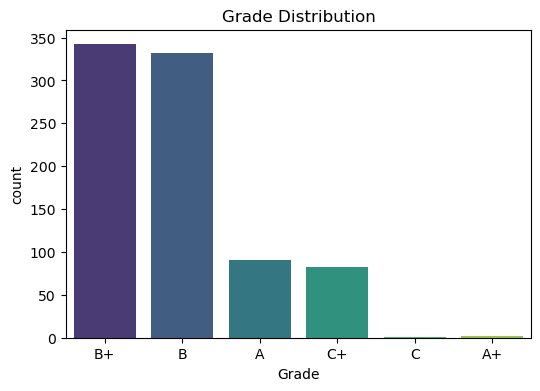

In [44]:
# Grade distribution bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='Grade', data=df, palette='viridis')
plt.title('Grade Distribution')
plt.savefig('grade_distribution.png')
plt.show()

In [38]:
df

,studentid,name,math_score,science_score,english_score,history_score,computer_score,total_score,average_score,Grade
0,1,Gloria Ruiz,74,84,82,64,53,357,71.4,B+
1,2,Elizabeth Richardson,49,65,56,88,68,326,65.2,B
2,3,Dr. Gabriel Perry,76,64,91,40,100,371,74.2,B+
3,4,Jillian Thompson,82,94,72,45,63,356,71.2,B+
4,5,James Rogers,94,60,64,83,93,394,78.8,B+
...,...,...,...,...,...,...,...,...,...,...
845,846,Edward Hodge,66,84,84,49,82,365,73.0,B+
846,847,Jessica Evans,78,92,46,91,53,360,72.0,B+
847,848,Mary Bell,90,63,99,40,42,334,66.8,B
848,849,Kimberly Snyder,89,80,49,84,65,367,73.4,B+


In [40]:
df.to_csv('Project.csv', index=False)
